***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize as células abaixo para importar as bibliotecas que precisar e para configurações gerais
#### <font color='red'>Sugestões: dplyr, ggplot2 etc.</font>

Carregamento do pacote Tidyverse

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados <- read_csv('dados.csv')

Rows: 76840 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): UF, Sexo, Idade, Cor, Anos de Estudo, Renda, Altura

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Visualize o conteúdo do DataFrame

In [3]:
dados

UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


### Para avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intervalos das classes em reais (R$)

In [4]:
# valor mínimo de salário
min(dados$Renda)

[1] 0

In [5]:
# valor máximo de salário
max(dados$Renda)

[1] 2e+05

In [6]:
salario <- c(0, 2*788, 5*788, 15*788, 25*788, 200000)
salario

[1]      0   1576   3940  11820  19700 200000

### 2º Definir os labels das classes

In [7]:
labels <- c('E', 'D', 'C', 'B', 'A')

### 3º Construir a coluna de frequências

In [8]:
frequencia_salario <- table(
  cut(
    x = dados$Renda,
    breaks = salario,
    labels = labels,
    include.lowest = TRUE
  )
)
frequencia_salario


    E     D     C     B     A 
49755 18602  7241   822   420 

### 4º Construir a coluna de percentuais

In [9]:
percentual <- prop.table(frequencia_salario) * 100
percentual


         E          D          C          B          A 
64.7514315 24.2087454  9.4234774  1.0697553  0.5465903 

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
frequencia_percentual <- cbind('Frequência' = frequencia_salario, 'Porcentagem (%)' = percentual)
frequencia_percentual

,Frequência,Porcentagem (%)
E,49755,64.7514315
D,18602,24.2087454
C,7241,9.4234774
B,822,1.0697553
A,420,0.5465903


In [11]:
frequencia_percentual[order(row.names(frequencia_percentual)),]

,Frequência,Porcentagem (%)
A,420,0.5465903
B,822,1.0697553
C,7241,9.4234774
D,18602,24.2087454
E,49755,64.7514315


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

#### <font color='red'>Lembre-se de transformar a matriz de resultados em um data frame.</font>

In [12]:
df_frequencia <- data.frame(frequencia_percentual)
df_frequencia

,Frequência,Porcentagem....
,<dbl>,<dbl>
E,49755,64.7514315
D,18602,24.2087454
C,7241,9.4234774
B,822,1.0697553
A,420,0.5465903


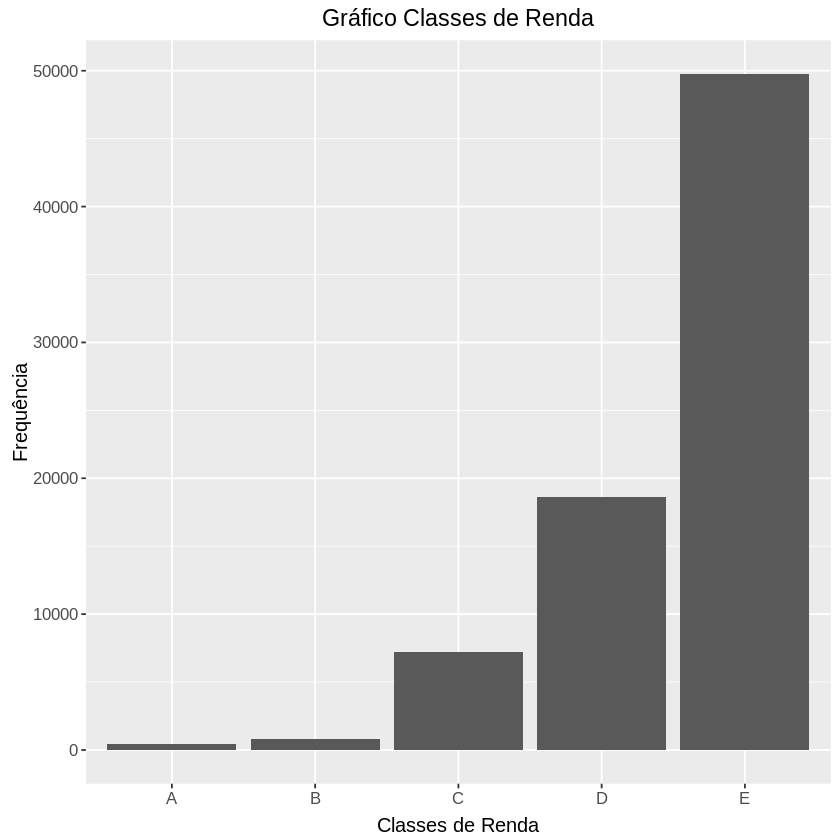

In [13]:
ggplot(df_frequencia, aes(x = row.names(df_frequencia), y = df_frequencia$`Frequência`)) +
    geom_bar(stat = "identity") +
    ylab("Frequência") +
    xlab("Classes de Renda") +
    ggtitle('Gráfico Classes de Renda') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

> ### Conclusões

A principal informação que podemos tirar destes dados convertidos em gráfico é que a classe E, ou seja, aqueles que recebem até dois salários mínimos (R$1.576,00) são a maioria esmagadora desta amostragem de dados, com quase 50000 de responsável por domicílio recebendo somente este valor de renda.


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [14]:
# como a base de dados foi carregado com a função read_csv, volta do tipo tibble, portando está sendo convertida como dataframe
dados <- data.frame(dados)
dados

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


In [15]:
options(repr.plot.width = 7, rep.plot.height = 4)

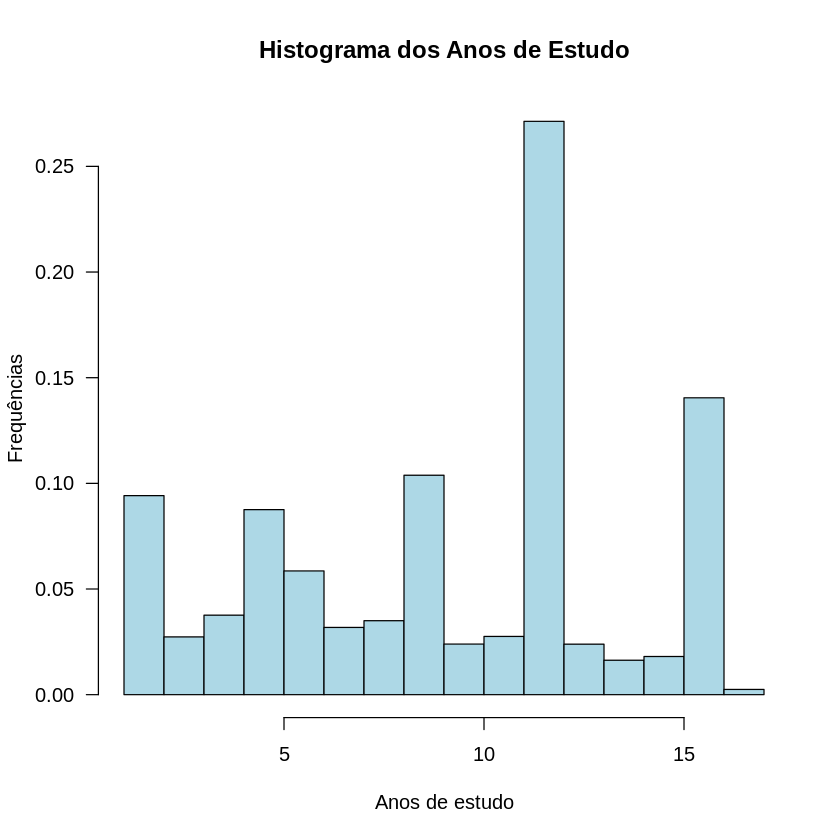

In [16]:
hist(
    x = dados$Anos.de.Estudo,
    breaks = 'Sturges',
    col = 'lightblue',
    main = 'Histograma dos Anos de Estudo',
    xlab = 'Anos de estudo',
    ylab = 'Frequências',
    prob = TRUE,
    las = 1
)

In [17]:
colnames(dados)

[1] "UF"             "Sexo"           "Idade"          "Cor"           
[5] "Anos.de.Estudo" "Renda"          "Altura"

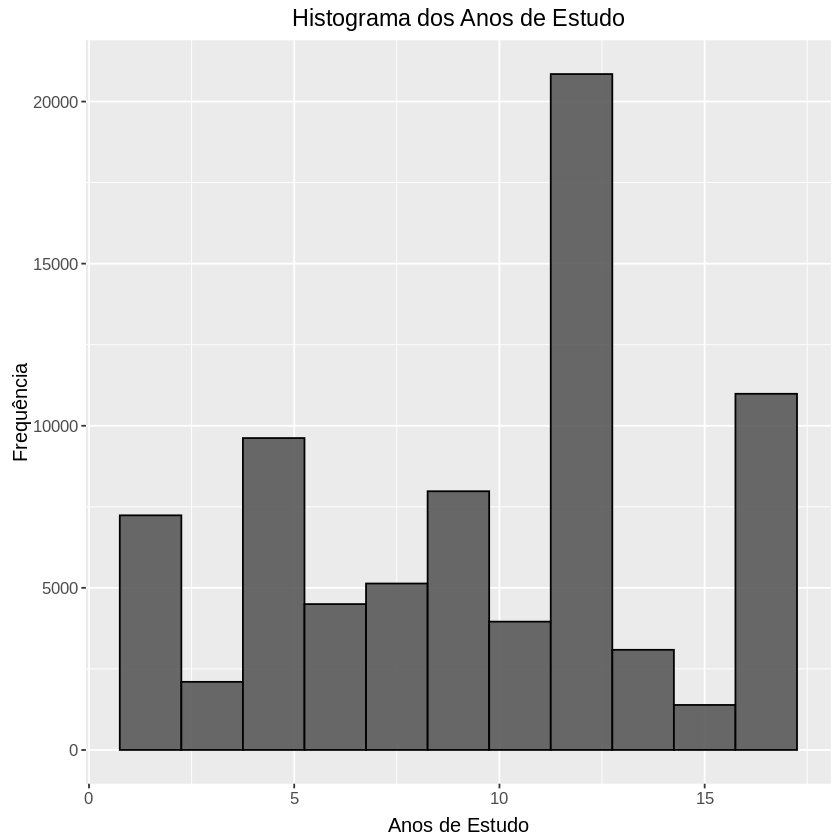

In [18]:
ggplot(dados, aes(x = Anos.de.Estudo)) +
    geom_histogram(binwidth = 1.5, color = "black", alpha = 0.9) +
    ylab("Frequência") +
    xlab("Anos de Estudo") +
    ggtitle('Histograma dos Anos de Estudo') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

In [19]:
summary(dados$Anos.de.Estudo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   11.00    9.47   12.00   17.00 

In [20]:
# função para calcular a moda
calc_moda <- function(x) {
  unique_vals <- unique(x)
  count_vals <- tabulate(match(x, unique_vals))
  moda <- unique_vals[which.max(count_vals)]
  return(moda)
}

calc_moda(dados$Anos.de.Estudo)

[1] 12

> ### Conclusões

Analisando os gráficos de histograma dos anos de estudo dos responsáveis pelas residências, podemos perceber uma assimetria à esquerda, ou seja, a mediana e a noda são maiores que a média, como podemos ver no gráfico e confirmar com o comando 'summary' e a função criada para analisar a moda. Pode-se chegar a conclusão que a maior quantidade de pessoas responsáveis pelo lar possuem 12 anos de estudo, em mais de 20000 dos casos totais analisados. Podemos inferir que seria o ensino fundamental e média completos, pelo tempo apresentado.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [21]:
dados_filtrados <- dados[dados$Renda <= 20000,]


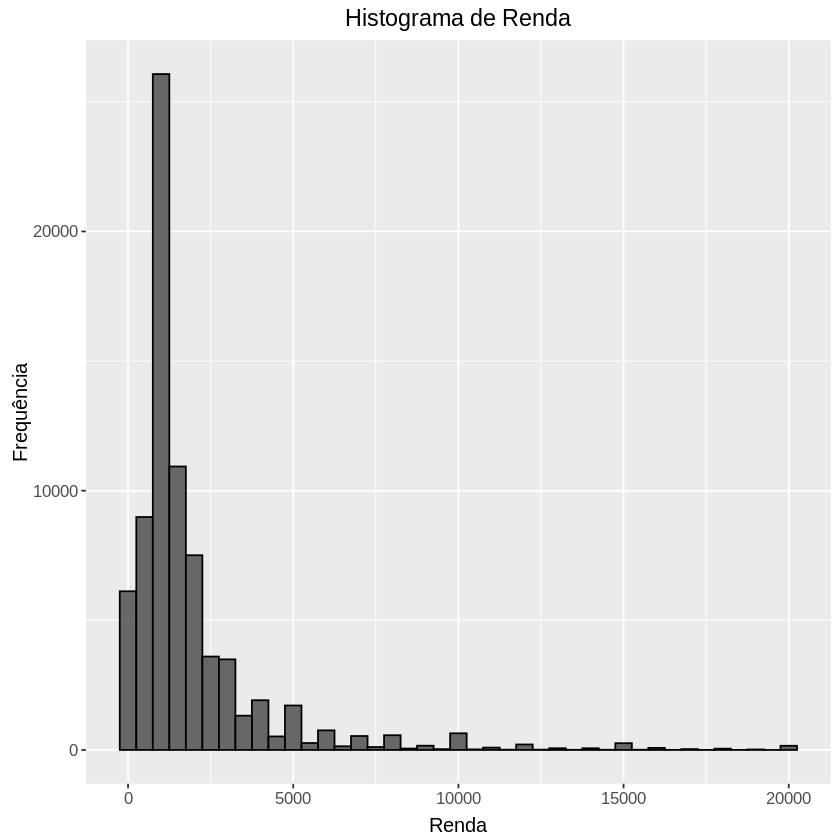

In [22]:
ggplot(dados_filtrados, aes(x = dados_filtrados$Renda)) +
    geom_histogram(binwidth = 500, color = "black", alpha = 0.9) +
    ylab("Frequência") +
    xlab("Renda") +
    ggtitle('Histograma de Renda') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

### Construa uma tabela de frequências e uma com os percentuais cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os vetores abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [23]:
sexo = c(
    'Masculino',
    'Feminino'
)
cor = c(
    'Indígena',
    'Branca',
    'Preta',
    'Amarela',
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano',
    '1 ano',
    '2 anos',
    '3 anos',
    '4 anos',
    '5 anos',
    '6 anos',
    '7 anos',
    '8 anos',
    '9 anos',
    '10 anos',
    '11 anos',
    '12 anos',
    '13 anos',
    '14 anos',
    '15 anos ou mais',
    'Não determinados'
)

In [68]:
# Sexo
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

# Cor
dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor

# Anos de Estudo
dados$Cat.Anos.de.Estudo <- factor(dados$Anos.de.Estudo, order = TRUE)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo

In [69]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<ord>
1,11,0,23,8,12,800,1.603808,Masculino,Parda,11 anos
2,11,1,23,2,12,1150,1.739790,Feminino,Branca,11 anos
3,11,1,35,8,15,880,1.760444,Feminino,Parda,14 anos
4,11,0,46,2,6,3500,1.783158,Masculino,Branca,5 anos
5,11,1,47,8,9,150,1.690631,Feminino,Parda,8 anos
6,11,1,34,8,12,790,1.637906,Feminino,Parda,11 anos


In [72]:
frequencia <- table(dados$Cat.Sexo, dados$Cat.Cor)
frequencia <- cbind(frequencia)
frequencia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [73]:
percentual <- cbind(prop.table(frequencia) * 100)
percentual

,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,0.1314420,12.52082,3.759761,0.1522644,14.13587


> ### Conclusões

Podemos verificar que a grande maioria dos responsáveis por domicílio desta amostra são homens, das etnias pardas e brancas, respectivamente.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [28]:
media <- mean(dados$Renda)
sprintf("A média da renda desta amostra é %.2f", media)

[1] "A média da renda desta amostra é 2000.38"

### Obtenha a mediana

In [29]:
mediana <- median(dados$Renda)
sprintf("A mediana da renda desta amostra é %.2f", mediana)

[1] "A mediana da renda desta amostra é 1200.00"

### Obtenha a moda

In [30]:
Moda <- function(x){
    freq <- table(x)
    return(names(freq[freq == max(freq)]))
}

In [31]:
moda <- Moda(dados$Renda)
sprintf("A moda da renda desta amostra é %s", moda)

[1] "A moda da renda desta amostra é 788"

### Obtenha a variância

In [32]:
variancia <- var(dados$Renda)
variancia

[1] 11044906

### Obtenha o desvio-padrão

In [33]:
desvio_padrao <- sd(dados$Renda)
desvio_padrao

[1] 3323.388

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *mean*, *median* e *max*</font>

In [34]:
media <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), mean)
rownames(media) <- c('Masculino', 'Feminino')
colnames(media) <- c('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda')
media

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


In [35]:
mediana <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), median)
rownames(mediana) <- c('Masculino', 'Feminino')
colnames(mediana) <- c('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda')
mediana

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


In [36]:
maximo <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), max)
rownames(maximo) <- c('Masculino', 'Feminino')
colnames(maximo) <- c('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda')
maximo

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,2e+05,50000,50000,1e+05
Feminino,120000,1e+05,23000,20000,3e+04


> ### Conclusões

Podemos tirar algumas conclusões, mesmo que simples e objetivas deste contexto. Com a etnia indígina, o padrão é invertido das demais etnias. Apesar da mediana masculina ser maior, a renda média e máxima destas pessoas são substancialmente maiores entre as mulheres do que no homens, como é nas demais etnias presentes. A média de renda nos chefes de família da etnia amarela, ou seja, os asiáticos de uma maneira geral, é maior do que as demais, porém a renda máxima desta família ainda é maior na etnia branca, tanto em homens quanto nas mulheres. Isso mostra a tendência e características gerais da ainda predominância da etnia branca.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *var* e *sd*</font>

In [48]:
variancia <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), var)
rownames(variancia) <- c('Masculino', 'Feminino')
colnames(variancia) <- c('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda')
variancia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [49]:
desvio_padrao <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), sd)
rownames(desvio_padrao) <- c('Masculino', 'Feminino')
colnames(desvio_padrao) <- c('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda')
desvio_padrao

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


> ### Conclusões

Podemos analisar que as mulheres indígenas são as que representam uma maior variação de renda em relação a média, seguidas dos homens asiáticos e brancos, respectivamente.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes;</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Cor, y = Renda, fill = Sexo)*.</font>

In [81]:
options(repr.plot.width = 15, rep.plot.height = 24)

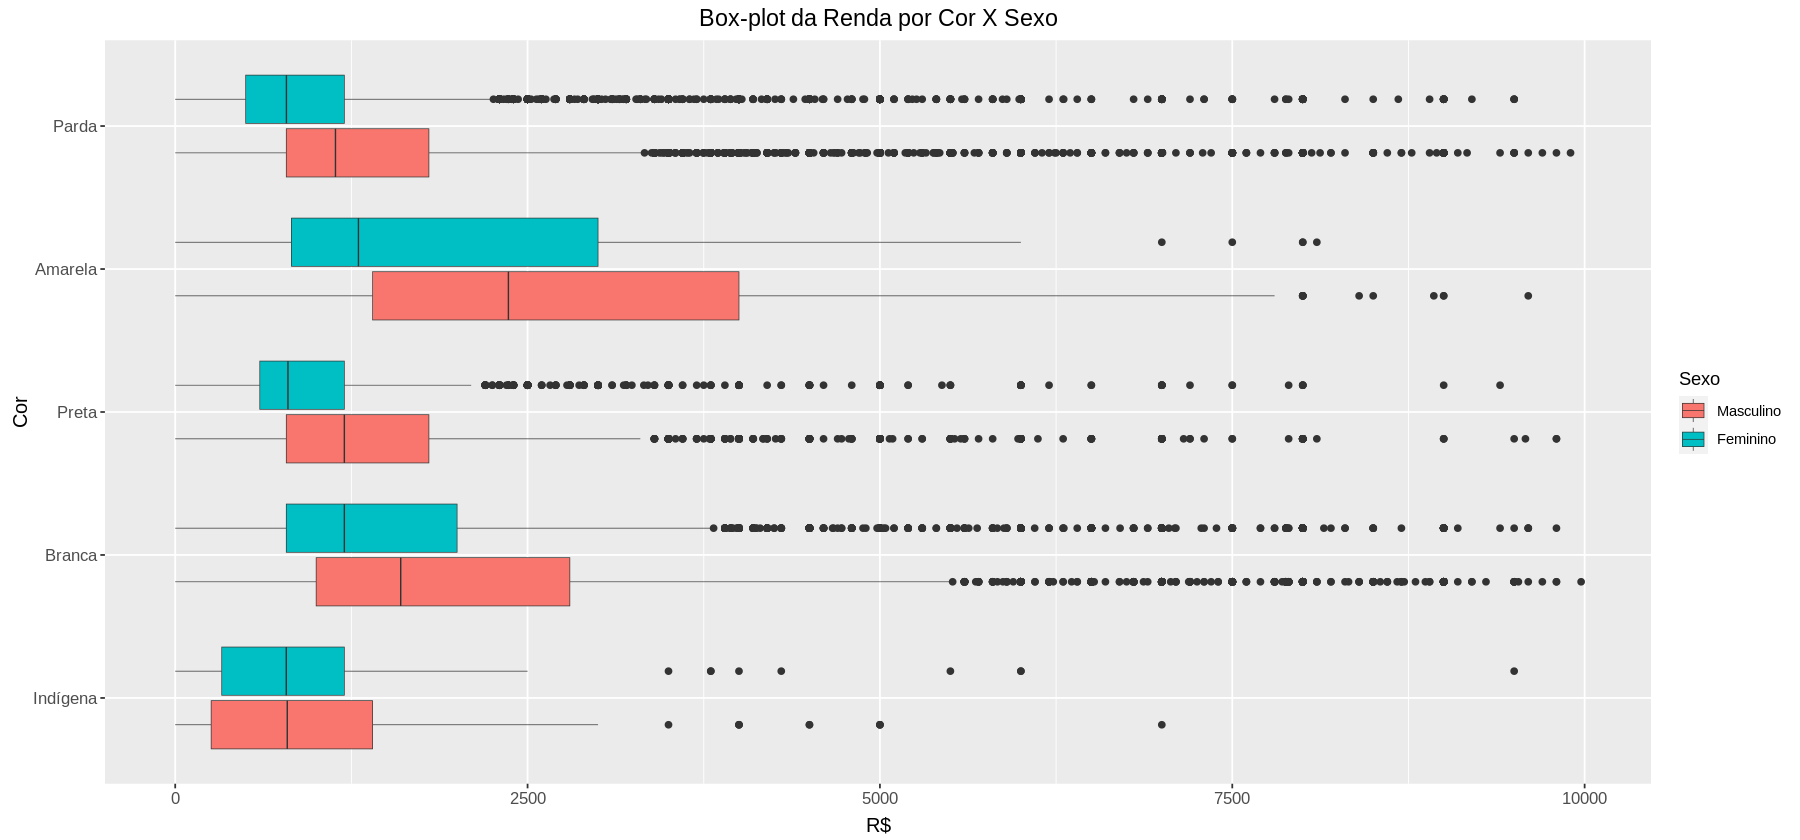

In [84]:
ggplot(data = dados[dados$Renda < 10000,], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) +
    geom_boxplot(size = 0.2) +
    coord_flip() +
    ylab("R$") +
    xlab("Cor") +
    guides(fill = guide_legend(title = 'Sexo')) +
    ggtitle('Box-plot da Renda por Cor X Sexo') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

> ### Conclusões

Podemos analisar que as etnias amarela e branca, independente do sexo, possuem uma renda acima das outras categorias. Outro ponto a ser analisado é que em todas etnias, exceto na indígena, os homens ganham mais que as mulheres.

### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?

In [61]:
length(dados$Renda[dados$Renda <= 788]) / length(dados$Renda) * 100

[1] 28.86778

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método *quantile()* para realizar esta análise.</font>

In [85]:
# centis <- c()
# for(i in 1:99){
#     centis <- c(centis, i / 100)
# }
# quantile(dados$Renda, centis)

quantile(dados$Renda, .99)

99% 
15000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>

In [87]:
# valores únicos de ano de estudo
unique(dados$Anos.de.Estudo)

[1] 12 15  6  9 14 16 10  1  5  7  3  2  4  8 11 17 13

In [63]:
media <- tapply(dados$Renda, list(dados$Sexo, dados$Anos.de.Estudo), mean)
rownames(media) <- c('Masculino', 'Feminino')
colnames(media) <- c(1:17)
media

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Masculino,799.4946,895.629,931.1790,1109.2039,1302.3293,1338.6532,1448.8754,1465.498,1639.3967,1508.0389,1731.2708,2117.061,2470.331,3195.099,3706.62,6134.280,1295.7619
Feminino,516.2017,492.772,529.9116,546.8539,704.2791,781.3898,833.7328,830.751,933.6154,868.0217,925.9192,1286.791,1682.314,1911.730,2226.46,3899.513,798.1744


In [64]:
mediana <- tapply(dados$Renda, list(dados$Sexo, dados$Anos.de.Estudo), median)
rownames(mediana) <- c('Masculino', 'Feminino')
colnames(mediana) <- c(1:17)
mediana

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Masculino,700,788,788,800,1000,1045,1200,1200,1300,1200,1218,1500,1800,2400,2500,4000,1200
Feminino,390,400,450,500,788,788,788,788,800,788,800,1000,1200,1300,1600,2800,788


In [65]:
maximo <- tapply(dados$Renda, list(dados$Sexo, dados$Anos.de.Estudo), max)
rownames(maximo) <- c('Masculino', 'Feminino')
colnames(maximo) <- c(1:17)
maximo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Masculino,30000,30000,40000,80000,50000,35000,25000,40000,30000,60000,45000,2e+05,30000,25000,50000,2e+05,7000
Feminino,10000,2000,4000,3500,10000,8000,6000,9000,18000,20000,6000,1e+05,120000,20000,20000,1e+05,3000


In [66]:
desvio_padrao <- tapply(dados$Renda, list(dados$Sexo, dados$Anos.de.Estudo), sd)
rownames(desvio_padrao) <- c('Masculino', 'Feminino')
colnames(desvio_padrao) <- c(1:17)
desvio_padrao

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Masculino,1023.9049,1331.9506,1435.1738,2143.8001,1419.8218,1484.6506,1476.629,1419.709,1515.5837,2137.6648,2078.6097,2676.539,2268.082,2797.117,3987.215,7447.614,979.6487
Feminino,639.3115,425.2918,498.2342,424.1244,629.5534,635.7826,574.547,602.038,896.7812,973.2217,620.6119,1819.040,4851.834,2053.790,2064.083,4212.771,459.9860


Podemos analisar um dado interessante neste banco de dados, com relação ao tempo de estudo informado e como poderemos interpretar e analisar. Com o comando unique(), verificamos todos os dados únicos que aparecem: de 1 à 17 anos.
Em média, (com exceção das mulheres, com 13 anos de estudo; que fogem da tendência normal de crescimento proporcional RENDA x ANOS DE ESTUDO), o aumento de anos de estudo e renda apresenta um crescimento diretamente proporcional. Porém esse dado cai abruptamente aos 17 anos de estudo. Este dado teria que ser estudado as causas ou a forma do preenchimento deste banco de dados. Por isso, como forma de tratamento de dados, foi escolhido substituir como "não determinado", conformo o vetor utilizado para definir os níveis com o fator.





In [ ]:
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano',
    '1 ano',
    '2 anos',
    '3 anos',
    '4 anos',
    '5 anos',
    '6 anos',
    '7 anos',
    '8 anos',
    '9 anos',
    '10 anos',
    '11 anos',
    '12 anos',
    '13 anos',
    '14 anos',
    '15 anos ou mais',
    'Não determinados'
)

In [88]:
media <- tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Anos.de.Estudo), mean)
media

,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Masculino,799.4946,895.629,931.1790,1109.2039,1302.3293,1338.6532,1448.8754,1465.498,1639.3967,1508.0389,1731.2708,2117.061,2470.331,3195.099,3706.62,6134.280,1295.7619
Feminino,516.2017,492.772,529.9116,546.8539,704.2791,781.3898,833.7328,830.751,933.6154,868.0217,925.9192,1286.791,1682.314,1911.730,2226.46,3899.513,798.1744


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Anos.de.Estudo, y = Renda, fill = Sexo)*.</font>

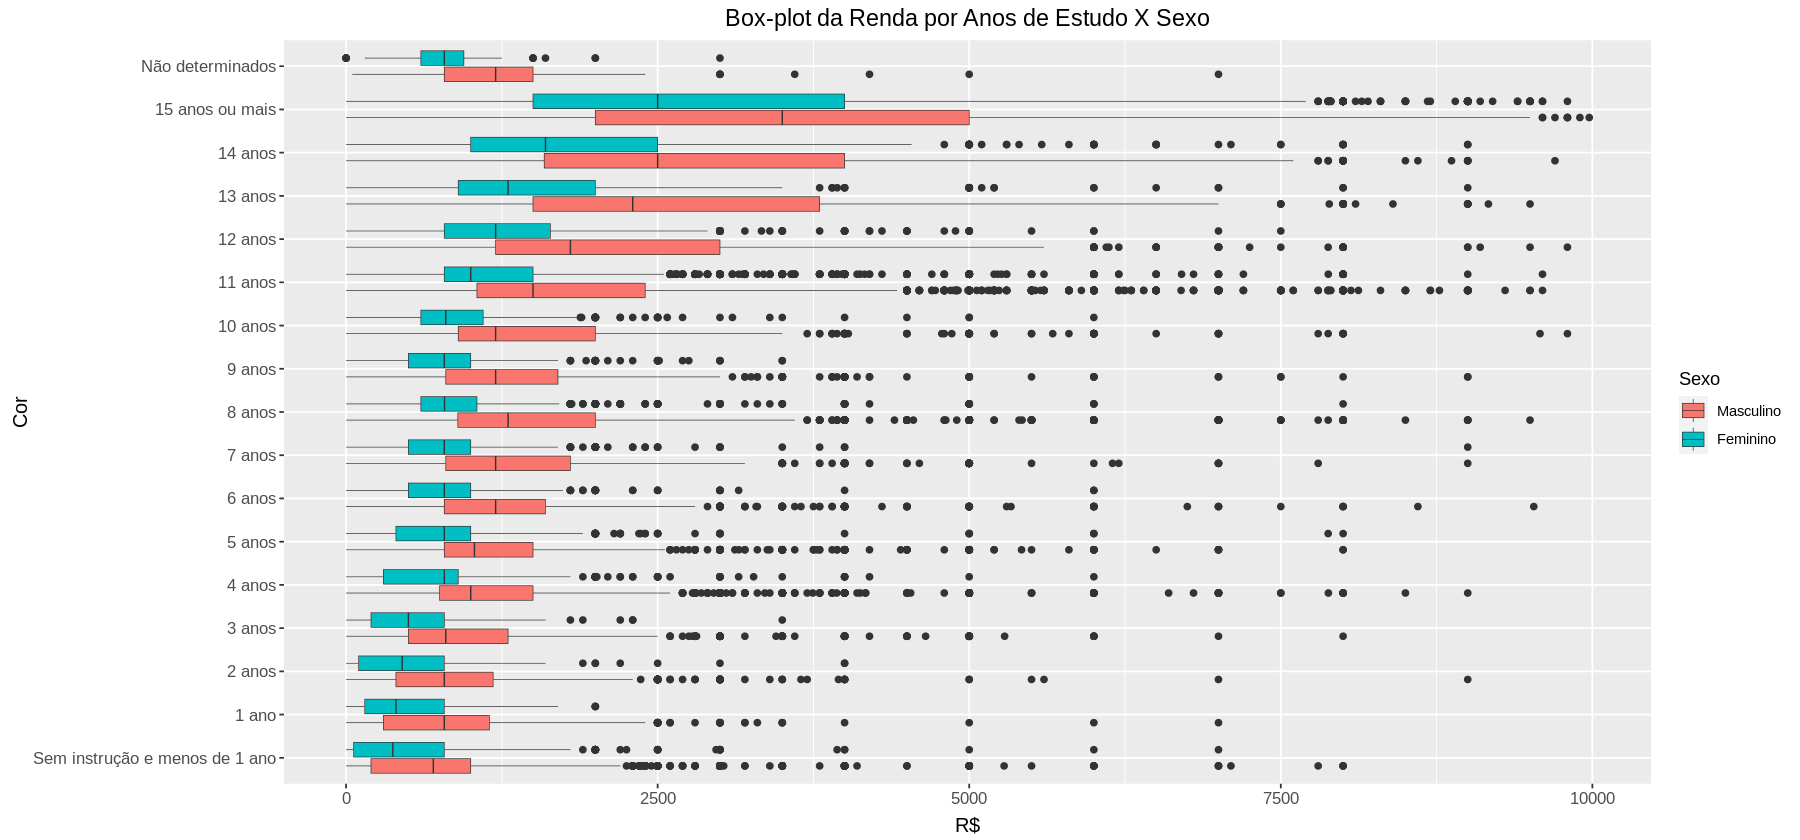

In [89]:
ggplot(data = dados[dados$Renda < 10000,], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) +
    geom_boxplot(size = 0.2) +
    coord_flip() +
    ylab("R$") +
    xlab("Cor") +
    guides(fill = guide_legend(title = 'Sexo')) +
    ggtitle('Box-plot da Renda por Anos de Estudo X Sexo') +
    theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

> ### Conclusões

Conforme analisado na conclusão anterior, a renda relativa à quantidade de anos de estudo é diretamente proporcional: quanto maior o tempo de estudo, maior a renda. Os homens continuam ganhando mais que as mulheres, mesmo aquelas pessoas com a mesma quantidade de tempo de estudo.